In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from dataclasses import dataclass

sns.set_style('darkgrid')  # Options: darkgrid, whitegrid, dark, white, ticks
sns.set_context('talk')  # Options: paper, notebook, talk, poster

In [2]:
@dataclass
class EpochData:
    """Class for keeping track of data associated with an epoch."""
    epoch: int
    loss: float
    train_accuracy: float
    test_accuracy: float
        

class Logs(object):
    def __init__(self, data):
        self.data = data
    
    def max_test_accuracy(self, max_diff=None):
        accuracies = []
        if max_diff is not None:
            accuracies = [d.test_accuracy for d in self.data if (d.train_accuracy - d.test_accuracy < max_diff)]
        else:
            accuracies = [d.test_accuracy for d in self.data]
        return max(accuracies)
    
    def max_accuracy_diff(self):
        diffs = [d.train_accuracy - d.test_accuracy for d in self.data]
        return max(diffs)
        


def get_data(filename):
    lines = open(filename).read().strip().split('\n')
    datalines = [l for l in lines if not l.startswith('#')]
    data = []
    for l in datalines:
        tokens = l.split(' | ')
        epoch = int(tokens[0].split(':')[1].strip())
        loss = float(tokens[1].split(':')[1].strip())
        train_accuracy = float(tokens[2].split(':')[1].strip())
        test_accuracy = float(tokens[3].split(':')[1].strip())
        epoch_data = EpochData(epoch, loss, train_accuracy, test_accuracy)
        data.append(epoch_data)
    return Logs(data)

In [3]:
files = {
    # Without Biases
    'mf_50_512_0.001_8_0.0_False': 'mf/mf_50_512_0.001_8_0.0_False.txt',
    'mf_50_512_0.001_16_0.0_False': 'mf/mf_50_512_0.001_16_0.0_False.txt',
    'mf_50_512_0.001_32_0.0_False': 'mf/mf_50_512_0.001_32_0.0_False.txt',
    'mf_50_512_0.001_64_0.0_False': 'mf/mf_50_512_0.001_64_0.0_False.txt',
    'mf_50_512_0.001_128_0.0_False': 'mf/mf_50_512_0.001_128_0.0_False.txt',
    'mf_50_512_0.001_256_0.0_False': 'mf/mf_50_512_0.001_256_0.0_False.txt',

    'mf_50_256_0.001_128_0.0_False': 'mf/mf_50_256_0.001_128_0.0_False.txt',
    'mf_50_1024_0.001_128_0.0_False': 'mf/mf_50_1024_0.001_128_0.0_False.txt',
    
    'mf_50_512_0.01_128_0.0_False': 'mf/mf_50_512_0.01_128_0.0_False.txt',
    'mf_50_512_0.0001_128_0.0_False': 'mf/mf_50_512_0.0001_128_0.0_False.txt',
    
    'mf_50_512_0.001_128_1e-7_False': 'mf/mf_50_512_0.001_128_1e-07_False.txt',
    'mf_50_512_0.001_128_1e-6_False': 'mf/mf_50_512_0.001_128_1e-06_False.txt',
    'mf_50_512_0.001_128_1e-5_False': 'mf/mf_50_512_0.001_128_1e-05_False.txt',
    'mf_50_512_0.001_128_0.0001_False': 'mf/mf_50_512_0.001_128_0.0001_False.txt',
    
    # With Biases
    'mf_50_512_0.001_8_0.0_True': 'mf/mf_50_512_0.001_8_0.0_True.txt',
    'mf_50_512_0.001_16_0.0_True': 'mf/mf_50_512_0.001_16_0.0_True.txt',
    'mf_50_512_0.001_32_0.0_True': 'mf/mf_50_512_0.001_32_0.0_True.txt',
    'mf_50_512_0.001_64_0.0_True': 'mf/mf_50_512_0.001_64_0.0_True.txt',
    'mf_50_512_0.001_128_0.0_True': 'mf/mf_50_512_0.001_128_0.0_True.txt',
    'mf_50_512_0.001_256_0.0_True': 'mf/mf_50_512_0.001_256_0.0_True.txt',
    
    'mf_50_256_0.001_128_0.0_True': 'mf/mf_50_256_0.001_128_0.0_True.txt',
    'mf_50_1024_0.001_128_0.0_True': 'mf/mf_50_1024_0.001_128_0.0_True.txt',
    
    'mf_50_512_0.01_128_0.0_True': 'mf/mf_50_512_0.01_128_0.0_True.txt',
    'mf_50_512_0.0001_128_0.0_True': 'mf/mf_50_512_0.0001_128_0.0_True.txt',
    
    'mf_50_512_0.001_128_1e-7_True': 'mf/mf_50_512_0.001_128_1e-07_True.txt',
    'mf_50_512_0.001_128_1e-6_True': 'mf/mf_50_512_0.001_128_1e-06_True.txt',
    'mf_50_512_0.001_128_1e-5_True': 'mf/mf_50_512_0.001_128_1e-05_True.txt',
    'mf_50_512_0.001_128_0.0001_True': 'mf/mf_50_512_0.001_128_0.0001_True.txt',
    
    # With Genre + Year information
    'mf_side_features_50_512_0.001_128_0.0': 'mf/mf_side_features_50_512_0.001_128_0.0.txt',
    'mf_side_features_50_512_0.001_128_1e-7': 'mf/mf_side_features_50_512_0.001_128_1e-07.txt',
    'mf_side_features_50_512_0.001_128_1e-6': 'mf/mf_side_features_50_512_0.001_128_1e-06.txt',
}

In [4]:
def plot_multiple_epochs(labels, file_keys, epoch_offset, plot_label, plot_title):
    data = {}
    
    # Use the first log file to get epochs
    parsed_data = get_data(files[file_keys[0]]).data
    data['Epochs'] = [d.epoch for d in parsed_data][epoch_offset:]
    
    for label, file_key in zip(labels, file_keys):
        parsed_data = get_data(files[file_key]).data
        test_accuracy = [d.test_accuracy for d in parsed_data][epoch_offset:]
        data[label] = test_accuracy
    
    width = 12
    length = 7
    fig, axs = plt.subplots(1, 1, figsize=(width, length))
    df = pd.DataFrame(data)
    df = pd.melt(df, ['Epochs'])
    df = df.rename(columns={'value': 'Test Accuracy', 'variable': plot_label})
    plt.title(plot_title)
    sns.lineplot(x='Epochs', y='Test Accuracy', hue=plot_label, data=df)

In [19]:
def bar_plot(labels, data, x_label, y_label, plot_title):
    width = 12
    length = 7
    fig, axs = plt.subplots(1, 1, figsize=(width, length))
    max_x = math.ceil(max(data))
    min_x = math.floor(min(data))
    plt.xlim([min_x, max_x])
    # fig.suptitle(plot_title)
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    ax = sns.barplot(x=data, y=labels)
    ax.bar_label(ax.containers[0], fmt='%.2f', size=16)

## Matrix Factorization - Embedding Size

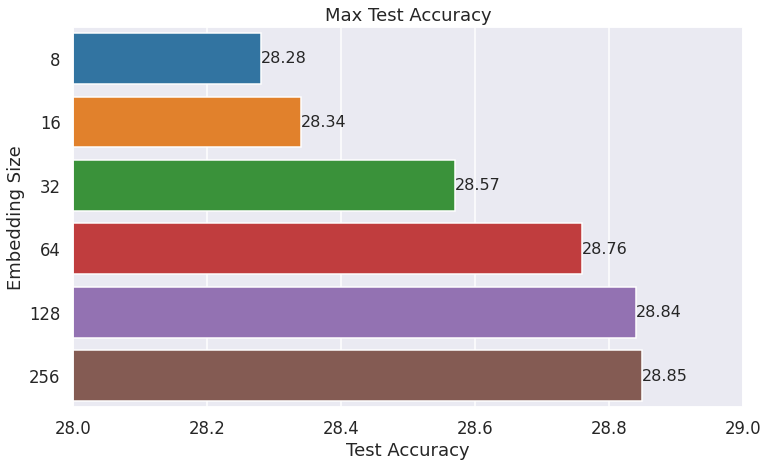

In [24]:
labels = ['8', '16', '32', '64', '128', '256']
file_keys = [
    'mf_50_512_0.001_8_0.0_False',
    'mf_50_512_0.001_16_0.0_False',
    'mf_50_512_0.001_32_0.0_False',
    'mf_50_512_0.001_64_0.0_False',
    'mf_50_512_0.001_128_0.0_False',
    'mf_50_512_0.001_256_0.0_False',
]
accuracies = [get_data(files[file_key]).max_test_accuracy() for file_key in file_keys]
bar_plot(labels, accuracies, 'Test Accuracy', 'Embedding Size', 'Max Test Accuracy')

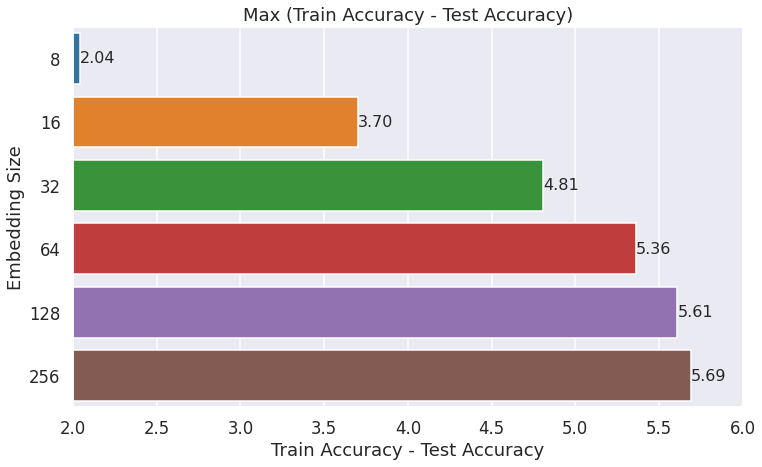

In [34]:
labels = ['8', '16', '32', '64', '128', '256']
file_keys = [
    'mf_50_512_0.001_8_0.0_False',
    'mf_50_512_0.001_16_0.0_False',
    'mf_50_512_0.001_32_0.0_False',
    'mf_50_512_0.001_64_0.0_False',
    'mf_50_512_0.001_128_0.0_False',
    'mf_50_512_0.001_256_0.0_False',
]
accuracies = [get_data(files[file_key]).max_accuracy_diff() for file_key in file_keys]
bar_plot(labels, accuracies, 'Train Accuracy - Test Accuracy', 'Embedding Size', 'Max (Train Accuracy - Test Accuracy)')

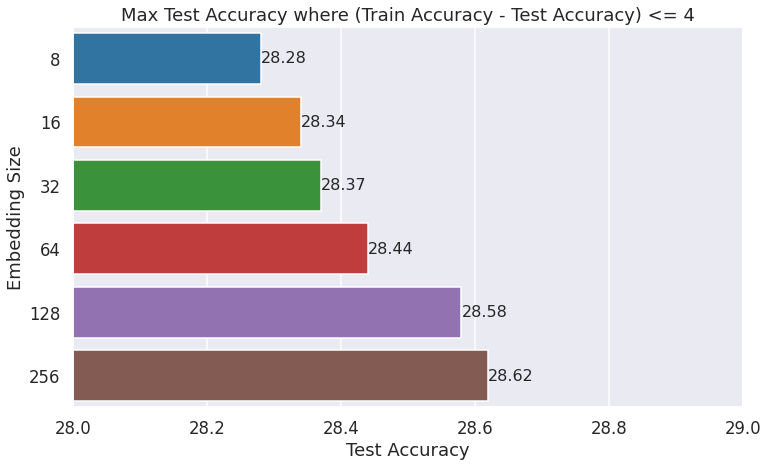

In [26]:
labels = ['8', '16', '32', '64', '128', '256']
file_keys = [
    'mf_50_512_0.001_8_0.0_False',
    'mf_50_512_0.001_16_0.0_False',
    'mf_50_512_0.001_32_0.0_False',
    'mf_50_512_0.001_64_0.0_False',
    'mf_50_512_0.001_128_0.0_False',
    'mf_50_512_0.001_256_0.0_False',
]
accuracies = [get_data(files[file_key]).max_test_accuracy(max_diff=4) for file_key in file_keys]
bar_plot(labels, accuracies, 'Test Accuracy', 'Embedding Size', 'Max Test Accuracy where (Train Accuracy - Test Accuracy) <= 4')

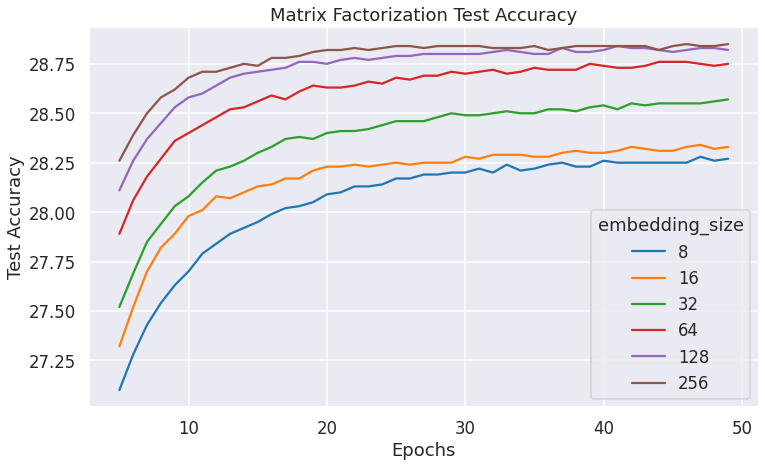

In [20]:
labels = ['8', '16', '32', '64', '128', '256']
file_keys = [
    'mf_50_512_0.001_8_0.0_False',
    'mf_50_512_0.001_16_0.0_False',
    'mf_50_512_0.001_32_0.0_False',
    'mf_50_512_0.001_64_0.0_False',
    'mf_50_512_0.001_128_0.0_False',
    'mf_50_512_0.001_256_0.0_False',
]
plot_multiple_epochs(labels, file_keys, 5, 'embedding_size', 'Matrix Factorization Test Accuracy')

## Matrix Factorization - Batch Size

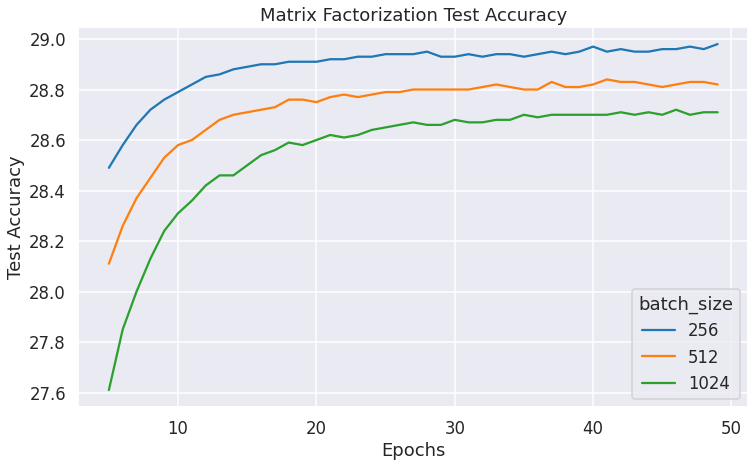

In [31]:
labels = ['256', '512', '1024']
file_keys = [
    'mf_50_256_0.001_128_0.0_False',
    'mf_50_512_0.001_128_0.0_False',
    'mf_50_1024_0.001_128_0.0_False',
]
plot_multiple_epochs(labels, file_keys, 5, 'batch_size', 'Matrix Factorization Test Accuracy')

## Matrix Multiplication - Learning Rate

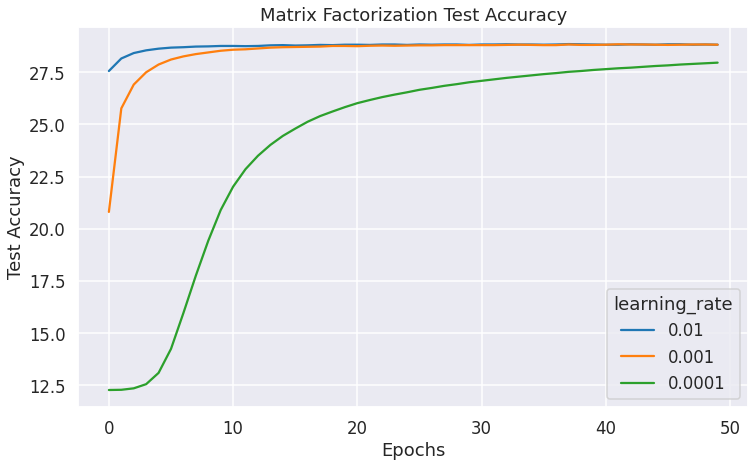

In [29]:
labels = ['0.01', '0.001', '0.0001']
file_keys = [
    'mf_50_512_0.01_128_0.0_False',
    'mf_50_512_0.001_128_0.0_False',
    'mf_50_512_0.0001_128_0.0_False',
]
plot_multiple_epochs(labels, file_keys, 0, 'learning_rate', 'Matrix Factorization Test Accuracy')

## Matrix Multiplication - L2 Regularization

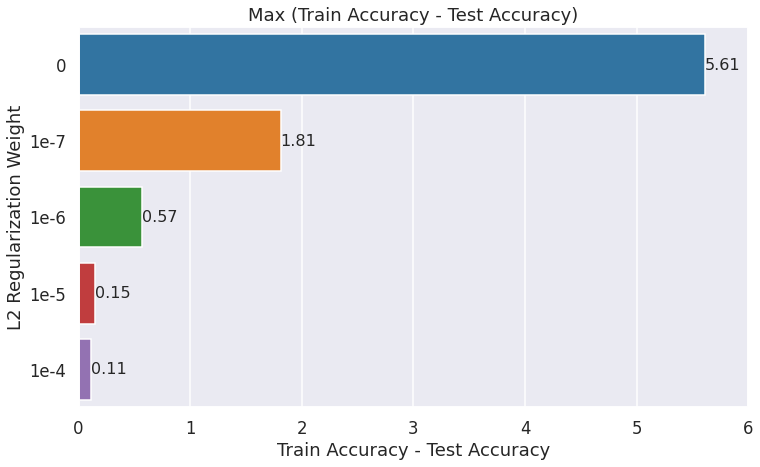

In [48]:
labels = ['0', '1e-7', '1e-6', '1e-5', '1e-4']
file_keys = [
    'mf_50_512_0.001_128_0.0_False',
    'mf_50_512_0.001_128_1e-7_False',
    'mf_50_512_0.001_128_1e-6_False',
    'mf_50_512_0.001_128_1e-5_False',
    'mf_50_512_0.001_128_0.0001_False',
]
accuracies = [get_data(files[file_key]).max_accuracy_diff() for file_key in file_keys]
bar_plot(labels, accuracies, 'Train Accuracy - Test Accuracy', 'L2 Regularization Weight', 'Max (Train Accuracy - Test Accuracy)')

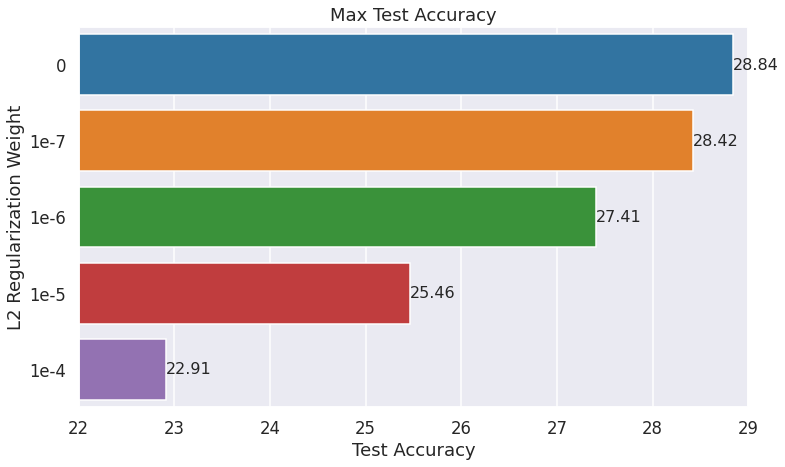

In [33]:
labels = ['0', '1e-7', '1e-6', '1e-5', '1e-4']
file_keys = [
    'mf_50_512_0.001_128_0.0_False',
    'mf_50_512_0.001_128_1e-7_False',
    'mf_50_512_0.001_128_1e-6_False',
    'mf_50_512_0.001_128_1e-5_False',
    'mf_50_512_0.001_128_0.0001_False',
]
accuracies = [get_data(files[file_key]).max_test_accuracy() for file_key in file_keys]
bar_plot(labels, accuracies, 'Test Accuracy', 'L2 Regularization Weight', 'Max Test Accuracy')

## Matrix Multiplication - Movie & User Biases

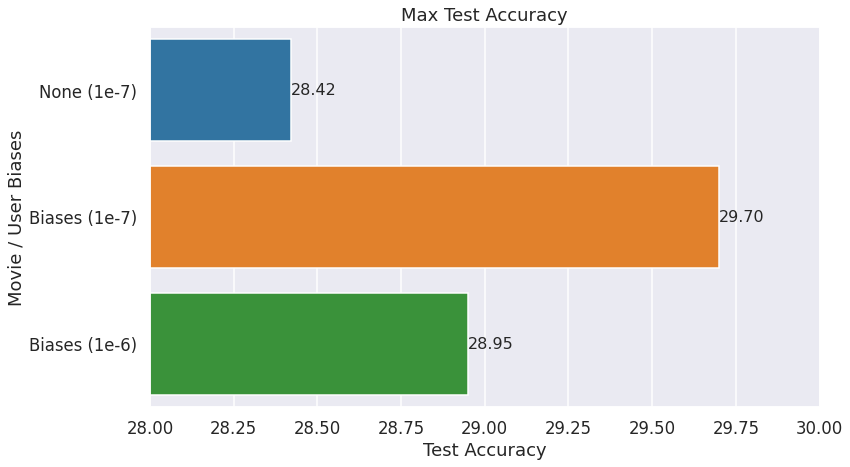

In [49]:
labels = ['None (1e-7)', 'Biases (1e-7)', 'Biases (1e-6)']
file_keys = [
    'mf_50_512_0.001_128_1e-7_False',
    'mf_50_512_0.001_128_1e-7_True',
    'mf_50_512_0.001_128_1e-6_True',
]
accuracies = [get_data(files[file_key]).max_test_accuracy(max_diff=None) for file_key in file_keys]
bar_plot(labels, accuracies, 'Test Accuracy', 'Movie / User Biases', 'Max Test Accuracy')

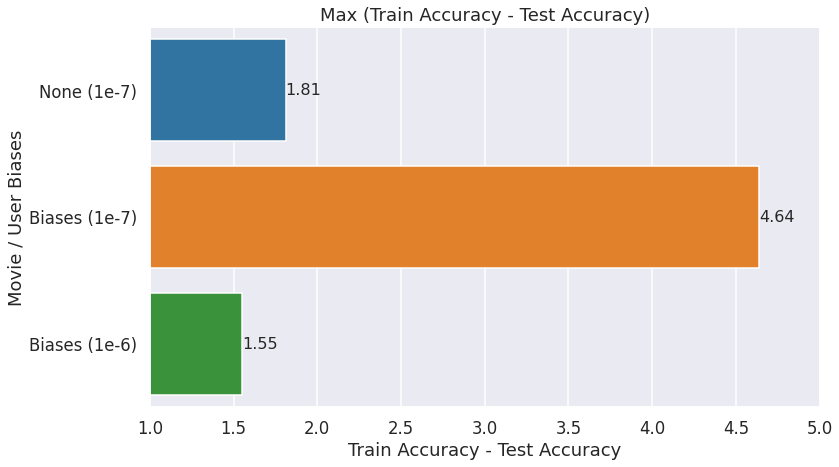

In [50]:
labels = ['None (1e-7)', 'Biases (1e-7)', 'Biases (1e-6)']
file_keys = [
    'mf_50_512_0.001_128_1e-7_False',
    'mf_50_512_0.001_128_1e-7_True',
    'mf_50_512_0.001_128_1e-6_True',
]
accuracies = [get_data(files[file_key]).max_accuracy_diff() for file_key in file_keys]
bar_plot(labels, accuracies, 'Train Accuracy - Test Accuracy', 'Movie / User Biases', 'Max (Train Accuracy - Test Accuracy)')

## Matrix Multiplication - Side Features

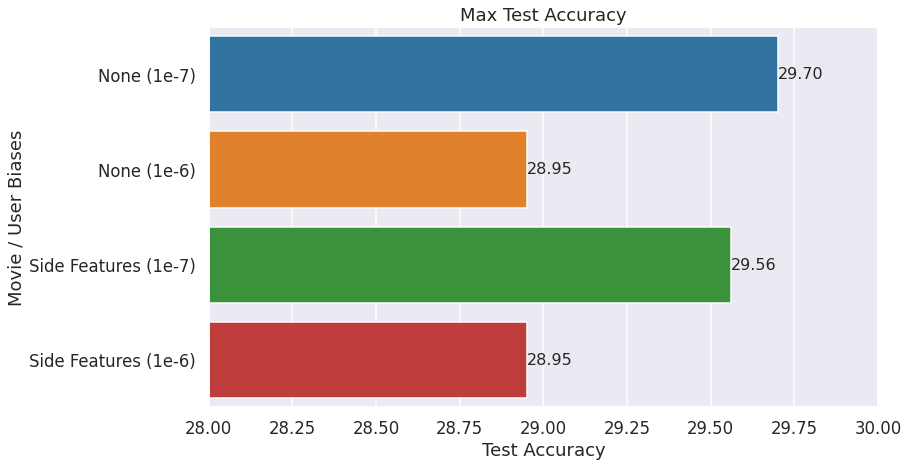

In [53]:
labels = ['None (1e-7)', 'None (1e-6)', 'Side Features (1e-7)', 'Side Features (1e-6)']
file_keys = [
    'mf_50_512_0.001_128_1e-7_True',
    'mf_50_512_0.001_128_1e-6_True',
    'mf_side_features_50_512_0.001_128_1e-7',
    'mf_side_features_50_512_0.001_128_1e-6',
]
accuracies = [get_data(files[file_key]).max_test_accuracy(max_diff=None) for file_key in file_keys]
bar_plot(labels, accuracies, 'Test Accuracy', 'Movie / User Biases', 'Max Test Accuracy')

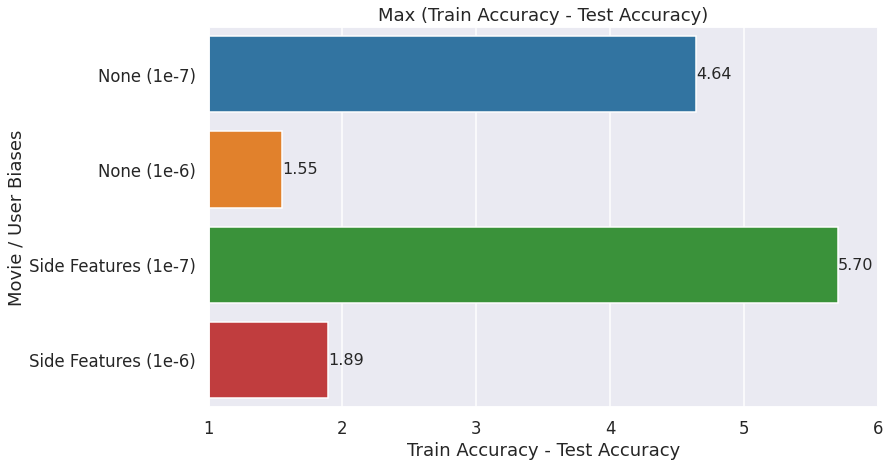

In [54]:
labels = ['None (1e-7)', 'None (1e-6)', 'Side Features (1e-7)', 'Side Features (1e-6)']
file_keys = [
    'mf_50_512_0.001_128_1e-7_True',
    'mf_50_512_0.001_128_1e-6_True',
    'mf_side_features_50_512_0.001_128_1e-7',
    'mf_side_features_50_512_0.001_128_1e-6',
]
accuracies = [get_data(files[file_key]).max_accuracy_diff() for file_key in file_keys]
bar_plot(labels, accuracies, 'Train Accuracy - Test Accuracy', 'Movie / User Biases', 'Max (Train Accuracy - Test Accuracy)')